In [ ]:
import itertools
from climada.engine import Impact

country = 'global'
warming_levels = ['1','2']
dir_impacts = {}
dir_impacts['pop'] = '/Users/szelie/OneDrive - ETH Zurich/data/impacts_multi_risk/results/aggr/'
dir_impacts['assets'] = '/Users/szelie/OneDrive - ETH Zurich/data/impacts_multi_risk/results/aggr/'

    
exposures = ['assets']
hazards = ['TC', 'RF']
combinations = list(itertools.combinations(hazards, 2))

impact_combined_ordered = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       "".join([dir_impacts[exposure], exposure,"_combined_impact_ordered_","_".join(combi), "_150arcsec_", warming, "_", country, "_caped.csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

impact_combined = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       "".join([dir_impacts[exposure], exposure,"_combined_impact_","_".join(combi), "_150arcsec_", warming, "_", country, "_caped.csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

In [ ]:
impact_combined_not_caped_no_drivers = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       "".join([dir_impacts[exposure], exposure,"_combined_impact_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

impact_combined_not_caped = {warming: {exposure: {combi: 
                   Impact.from_csv(
                       "".join([dir_impacts[exposure], exposure,"_combined_impact_ordered_","_".join(combi), "_150arcsec_", warming, "_", country, ".csv"]))
                   for combi in combinations} for exposure in exposures} for warming in warming_levels}

In [180]:
diff = impact_combined_not_caped['1']['assets'][('TC',
    'RF')].at_event-impact_combined_ordered['1']['assets'][('TC',
    'RF')].at_event

In [182]:
np.sum(diff>0)

714

In [ ]:
from climada.engine import Impact

dir_impacts = "/Users/szelie/Library/CloudStorage/OneDrive-ETHZurich/data/impacts_multi_risk/results/yearsets/"

hazards = ['TC', 'RF']
exposures = ['assets', 'pop']
warming_levels = ['1','2']
country = 'global'

impacts_yearsets = {warming: {exposure: {hazard: 
                   Impact.from_csv(
                       "".join([dir_impacts, hazard, '_', exposure,"_impacts_yearsets_150arcsec_", warming, "_", country, "_caped.csv"]))
                   for hazard in hazards} for exposure in exposures} for warming in warming_levels}



impacts_yearsets_not_caped = {warming: {exposure: {hazard: 
                   Impact.from_csv(
                       "".join([dir_impacts, hazard, '_', exposure,"_impacts_yearsets_150arcsec_", warming, "_", country, ".csv"]))
                   for hazard in hazards} for exposure in exposures} for warming in warming_levels}




In [ ]:
import pandas as pd
df = pd.DataFrame({'models':["_".join(event_name.split("_")[1:3]) for event_name in impacts_yearsets['1']['assets']['RF'].event_name], 'RF':impacts_yearsets['1']['assets']['RF'].at_event, 'TC':impacts_yearsets['1']['assets']['TC'].at_event,
             "combined":impact_combined_ordered['1']['assets'][('TC','RF')].at_event})
df.groupby('models').max()

In [ ]:
import pandas as pd
df = pd.DataFrame({'models':["_".join(event_name.split("_")[1:3]) for event_name in impacts_yearsets['2']['assets']['RF'].event_name], 'RF':impacts_yearsets['2']['assets']['RF'].at_event, 'TC':impacts_yearsets['2']['assets']['TC'].at_event,
             "combined":impact_combined_ordered['2']['assets'][('TC','RF')].at_event})
df.groupby('models').max()

In [328]:
import numpy as np
def order_events_by_indices(impact, indices):
    """
    Order event names based on given strings contained in the event names.

    Parameters
    ----------
    impact: Impact
        with event_name based on the given strings
    n_events: Int
        Number of events in the output. Default: 1
    list_string : list
        A list of string based on which to order the events.
        For example climate models ['miroc5','ipsl-cm5a-lr','gfdl-esm2m','hadgem2-es']
        default is None


    Raises
    ------
    AttributeError
        If no list is providing

    Returns
    -------
    impact : Impact
        Impact yearset.

    """
    impact_ordered = Impact()
    if impact_ordered.imp_mat.shape[0]>0:   
        impact_ordered.imp_mat = impact.imp_mat[indices]
    
    impact_ordered.event_name = [impact.event_name[index] for index in indices]
    impact_ordered.event_id = np.arange(len(impact_ordered.event_name))
    frequency = impact.frequency[indices]
    impact_ordered.frequency = frequency*(len(impact.event_id)/len(impact_ordered.event_id))
    impact_ordered.at_event = impact.at_event[indices]
    impact_ordered.aai_agg = np.median(impact_ordered.at_event)
    impact_ordered.coord_exp = impact.coord_exp
    impact_ordered.date = impact.date[indices]
    return impact_ordered

fq = impacts_yearsets['1']['assets']['RF'].calc_freq_curve(return_per=np.arange(1,100))
#fq.impact = fq.impact + impacts_yearsets['1980_2010']['assets']['TC'].calc_freq_curve(return_per=np.arange(1,100)).impact

import matplotlib.pyplot as plt
import numpy as np

def make_fq_list(impact, factor):
    fq_list = []
    for n in range(10000):
        imp_sample = order_events_by_indices(impact, shuffle(np.arange(len(impact.event_name)))[0:500])
        fq = imp_sample.calc_freq_curve(np.arange(0,100))
        fq_list.append(fq.impact/factor)
    return fq_list, fq.return_per

def plot_return_period_samples(fq_list, return_per, ax, color, label, range=True, linestyle="solid", linewidth=1.5):
    ax.plot(fq.return_per,np.median(fq_list,axis=0), color=color, label=label, linestyle=linestyle,linewidth=linewidth)
    ax.legend()
    if range:
        ax.fill_between(fq.return_per,np.median(fq_list,axis=0),np.percentile(fq_list,q=95,axis=0), color=color, alpha=0.3)
        ax.fill_between(fq.return_per,np.percentile(fq_list,q=5,axis=0), np.median(fq_list,axis=0),color=color, alpha=0.3)
    return ax

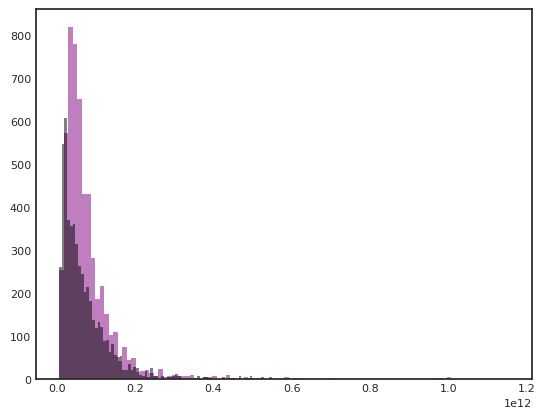

In [329]:
fig, ax = plt.subplots()

ax.hist(impacts_yearsets['1']['assets']['TC'].at_event, bins=100, alpha=0.5, color = "Purple")
ax.hist(impacts_yearsets['2']['assets']['TC'].at_event, bins=100, alpha=0.5, color = "Black")
plt.show()

(array([ 14.,   7.,  18.,  11.,  35.,  34.,  48.,  52.,  74.,  59.,  73.,
         73.,  89.,  75.,  91., 121., 102., 135., 119., 133., 124.,  83.,
        125., 158., 135., 113., 131., 105., 112., 111.,  97.,  92.,  91.,
         69., 110.,  73.,  81.,  72.,  68.,  84.,  78.,  67.,  94.,  75.,
         59.,  80.,  63.,  62.,  66.,  56., 101.,  47.,  56.,  74.,  52.,
         52.,  49.,  76.,  40.,  48.,  37.,  44.,  48.,  17.,  52.,  22.,
         19.,  36.,  40.,  24.,  29.,  14.,  14.,  25.,  27.,   9.,  10.,
          5.,  11.,  15.,   3.,  20.,   0.,   5.,   1.,   5.,   1.,   5.,
          6.,   2.,   2.,   4.,   1.,   4.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.66158714e+07, 4.09487127e+07, 4.52815540e+07, 4.96143953e+07,
        5.39472367e+07, 5.82800780e+07, 6.26129193e+07, 6.69457606e+07,
        7.12786019e+07, 7.56114432e+07, 7.99442845e+07, 8.42771258e+07,
        8.86099671e+07, 9.29428085e+07, 9.72756498e+07, 1.01608491e+08,
        1.05941332e+08, 1.1027

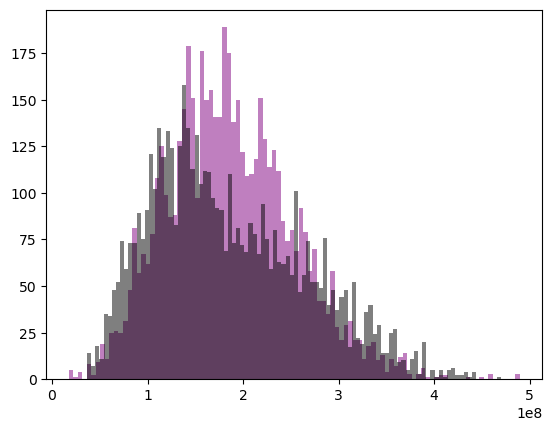

In [506]:
fig, ax = plt.subplots()

ax.hist(impacts_yearsets['1']['pop']['TC'].at_event, bins=100, alpha=0.5, color = "Purple")
ax.hist(impacts_yearsets['2']['pop']['TC'].at_event, bins=100, alpha=0.5, color = "Black")


(array([ 79.,  83., 119., 167., 324., 288., 249., 299., 236., 268., 180.,
        215., 232., 172., 215., 201., 160., 176., 155., 111., 141.,  73.,
        118., 102.,  64.,  68.,  89.,  13.,  59.,  61.,  72.,  25.,  67.,
         23.,  33.,  29.,  31.,  29.,  12.,   0.,  12.,  17.,   0.,  21.,
         23.,   7.,  17.,   9.,   0.,   0.,   0.,   6.,   5.,  11.,   6.,
         10.,   0.,   0.,   0.,   6.,  11.,   0.,   4.,  11.,   0.,   0.,
          0.,   8.,   0.,   0.,   7.,   0.,   9.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          8.]),
 array([9.35893687e+09, 1.44457657e+10, 1.95325945e+10, 2.46194234e+10,
        2.97062522e+10, 3.47930810e+10, 3.98799099e+10, 4.49667387e+10,
        5.00535675e+10, 5.51403964e+10, 6.02272252e+10, 6.53140540e+10,
        7.04008829e+10, 7.54877117e+10, 8.05745405e+10, 8.56613694e+10,
        9.07481982e+10, 9.5835

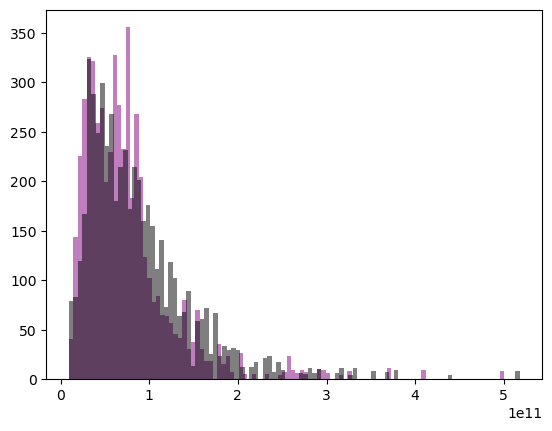

In [502]:
fig, ax = plt.subplots()

ax.hist(impacts_yearsets['1']['assets']['RF'].at_event, bins=100, alpha=0.5, color = "Purple")
ax.hist(impacts_yearsets['2']['assets']['RF'].at_event, bins=100, alpha=0.5, color = "Black")

In [33]:
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12


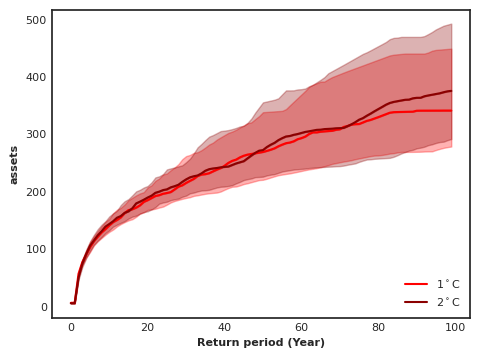

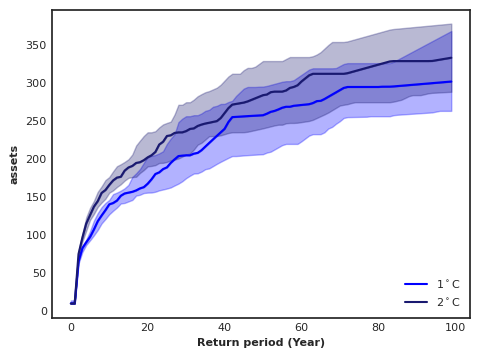

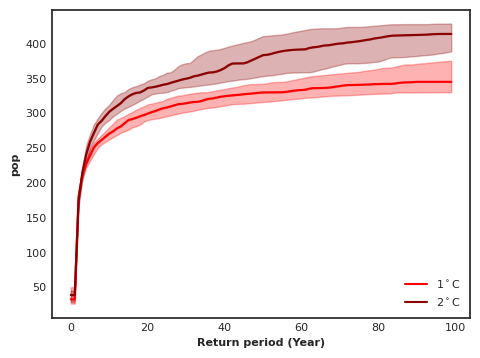

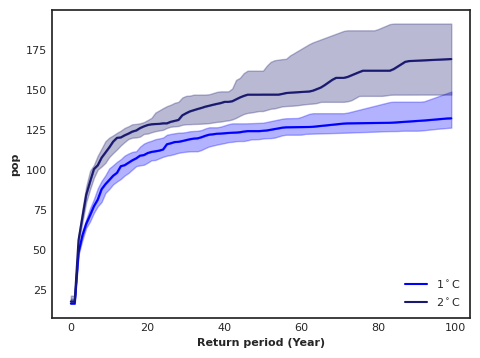

In [330]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

aai_single_hazard = {}
y100_single_hazard = {}


colors = {}
colors['TC'] = {'1':'red', '2':'darkred'}
colors['RF'] = {'1':'blue', '2':'midnightblue'}


factor_dict = {"assets":1e9, "pop":1e6}
for exposure in ["assets", "pop"]:
    aai_single_hazard[exposure] = {}
    y100_single_hazard[exposure] = {}
    for haz in ['TC', 'RF']:
        aai_single_hazard[exposure][haz] = {}
        y100_single_hazard[exposure][haz] = {}
        fig,ax = plt.subplots(figsize=(5.4,4))

        fq_list, fq.return_per =  make_fq_list(impacts_yearsets['1'][exposure][haz], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list, fq.return_per, ax, color=colors[haz]['1'], label="1$^\circ$C", range=True)
        aai_single_hazard[exposure][haz]['1'] = np.median(np.sum(fq_list,axis=1)/len(fq_list[0]))
        y100_single_hazard[exposure][haz]['1'] = np.median(fq_list, axis=0)[-1]

        fq_list, fq.return_per =  make_fq_list(impacts_yearsets['2'][exposure][haz], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list, fq.return_per, ax, color=colors[haz]['2'], label="2$^\circ$C", range=True)
        aai_single_hazard[exposure][haz]['2'] = np.median(np.sum(fq_list,axis=1)/len(fq_list[0]))

        y100_single_hazard[exposure][haz]['2'] = np.median(fq_list, axis=0)[-1]

        
    
        ax.set_ylabel(exposure)
        ax.set_xlabel("Return period (Year)")
        #ax.set_title(" ".join([haz, exposure]))
        #ax.set_ylabel(ylabel[exposure])
        ax.legend(loc="lower right")


        #plt.savefig("".join(['/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/return_periods_cc_',haz, '_', exposure,".pdf"]), bbox_inches='tight')

        

In [109]:
aai_single_hazard

{'assets': {'TC': {'1': 252.3233523751864, '2': 259.2888384845401},
  'RF': {'1': 232.15998887808883, '2': 259.7819278511879}},
 'pop': {'TC': {'1': 313.18299544230877, '2': 360.712141687652},
  'RF': {'1': 116.61836990702282, '2': 140.7151862407294}}}

In [ ]:
import copy

ylabel = {"assets":"Impact (Billion USD)","pop":"Impact (Million people affected)"}

for exposure in ["pop"]:
    for period in ["1", "2"]:    
        fq_list_ordered, fq.return_per =  make_fq_list(impact_combined_ordered[period][exposure][('TC','RF')], factor=factor_dict[exposure])
        fq_list_not_capped, fq.return_per =  make_fq_list(impact_combined_not_caped[period][exposure][('TC','RF')], factor=factor_dict[exposure])
        fq_list_not_capped_no_common_drivers, fq.return_per =  make_fq_list(impact_combined_not_caped_no_drivers[period][exposure][('TC','RF')], factor=factor_dict[exposure])
        fq_list_no_common_drivers, fq.return_per =  make_fq_list(impact_combined[period][exposure][('TC','RF')], factor=factor_dict[exposure])
        

In [17]:
ylabel = {"assets":"Impact (Billion USD)","pop":"Impact (Million people affected)"}


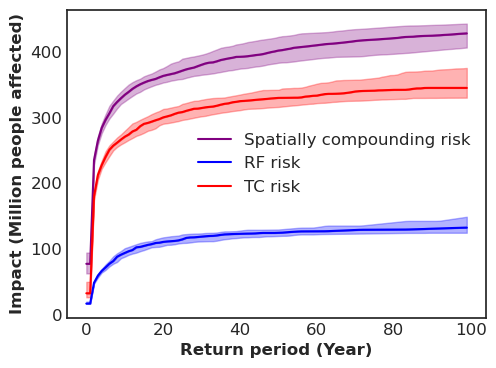

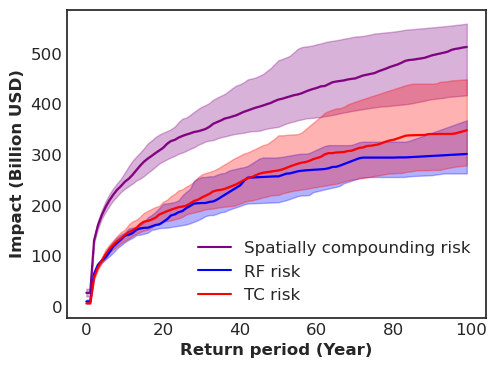

In [37]:
import copy


for exposure in ["pop", "assets"]:
    for period in ["1"]:
        yearsets_sum = copy.deepcopy(impacts_yearsets[period][exposure]['RF'])
        yearsets_sum.at_event = impacts_yearsets[period][exposure]['RF'].at_event + shuffle(impacts_yearsets[period][exposure]['TC'].at_event)
        fig,ax = plt.subplots(figsize=(5.4,4))
        fq_list_rf, fq.return_per =  make_fq_list(impacts_yearsets[period][exposure]['RF'], factor=factor_dict[exposure])
        fq_list_tc, fq.return_per =  make_fq_list(impacts_yearsets[period][exposure]['TC'], factor=factor_dict[exposure])

        fq_list_sumed, fq.return_per =  make_fq_list(yearsets_sum, factor=factor_dict[exposure])
    
        fq_list_ordered, fq.return_per =  make_fq_list(impact_combined_ordered[period][exposure][('TC','RF')], factor=factor_dict[exposure])
        fq_list, fq.return_per =  make_fq_list(impact_combined_not_caped_no_drivers[period][exposure][('TC','RF')], factor=factor_dict[exposure])

        
        plot_return_period_samples(fq_list_ordered, fq.return_per, ax, color="Purple", label="Spatially compounding risk", range=True)

       # plot_return_period_samples(fq_list, fq.return_per, ax, color="black", linestyle='dashed', label="Aggregated", range=True, linewidth=0.5)

        fq_list_rf, fq.return_per =  make_fq_list(impacts_yearsets[period][exposure]['RF'], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list_rf, fq.return_per, ax, color="Blue", label="RF risk", range=True)

        plot_return_period_samples(fq_list_tc, fq.return_per, ax, color="Red", label="TC risk", range=True)

        ax.set_xlabel("Return period (Year)")
        ax.set_ylabel(ylabel[exposure])

        #plt.savefig("".join(['/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report/figures/return_periods_aggr_1degree_',exposure,".jpg"]), dpi=1200, bbox_inches='tight')


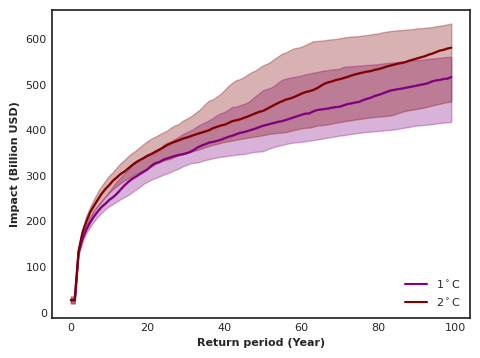

In [354]:

import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

fq_single_hazard = {}
aai_single_hazard = {}

y100_single_hazard = {}



colors = {'1':'lightblue', '2':'plum', '3':'black'}


for exposure in ["assets"]:
    fig,ax = plt.subplots(figsize=(5.4,4))
    fq_list, fq.return_per =  make_fq_list(impact_combined_ordered['1'][exposure][('TC', 'RF')], factor=factor_dict[exposure])

    plot_return_period_samples(fq_list, fq.return_per, ax, color="purple", label="1$^\circ$C", range=True)

    fq_list_rf, fq.return_per =  make_fq_list(impact_combined_ordered['2'][exposure][('TC', 'RF')], factor=factor_dict[exposure])
    plot_return_period_samples(fq_list_rf, fq.return_per, ax, color="maroon", label="2$^\circ$C", range=True)

#         fq_list_rf, fq.return_per =  make_fq_list(impact_combined_ordered['3'][exposure][('TC', 'RF')])
#         plot_return_period_samples(fq_list_rf, fq.return_per, ax, color="gray", label="3", range=True)


    ax.set_ylabel(ylabel[exposure])
    ax.set_xlabel("Return period (Year)")
    ax.legend(loc="lower right")
   

In [ ]:
np.median(fq_list, axis=0)

In [251]:
np.median(fq_list, axis=0)

array([ 76.1597502 ,  76.1597502 , 238.6724289 , 281.0315415 ,
       307.38094805, 326.02506593, 340.13410576, 351.79895236,
       358.2955814 , 365.12483032, 369.85289432, 373.68610551,
       377.77239013, 382.1630677 , 386.4181495 , 389.86665398,
       393.31948176, 397.00494471, 400.84252004, 403.78001159,
       405.70397262, 409.63159184, 411.28444193, 413.52803997,
       415.9342389 , 419.05521817, 420.94691467, 423.14182264,
       425.4097966 , 426.31531203, 427.9246032 , 429.99800817,
       431.14867398, 432.17108711, 433.72873997, 435.53941605,
       437.02805317, 438.28761693, 439.49742875, 440.79644119,
       442.0058276 , 443.11632029, 444.25872943, 445.38246984,
       446.54334731, 448.11527668, 449.21602006, 449.5810626 ,
       449.91570905, 450.37399423, 451.22778051, 452.43996965,
       453.62731666, 454.82809229, 456.24168273, 457.2783519 ,
       458.20155069, 459.10537791, 459.84666541, 460.78089952,
       461.25367676, 462.03169019, 462.49762334, 463.39

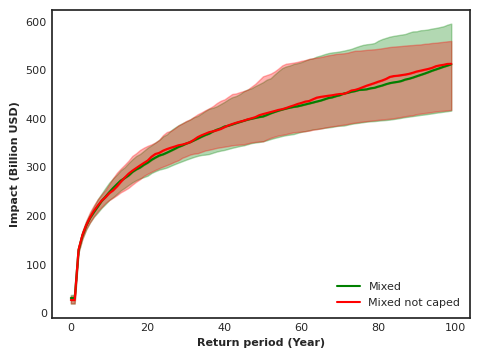

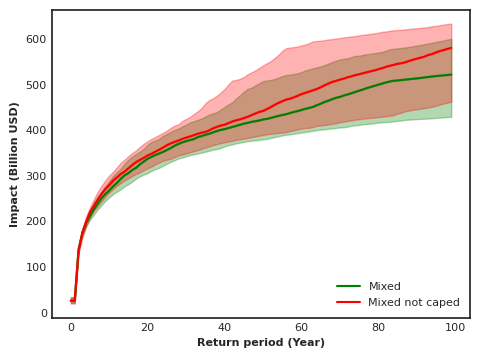

In [355]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

fq_single_hazard = {}
aai_single_hazard = {}

y100_single_hazard = {}



colors = {'1':'lightblue', '2':'plum', '3':'black'}

y100_aai_ord = {}
y100_aai_no_drivers = {}
y100_aai_no_drivers_not_caped = {}
y100_aai_not_caped = {}

aai_ord = {}
aai_no_drivers = {}
aai_no_drivers_not_caped = {}
aai_not_caped = {}

for exposure in ["assets"]:
    y100_aai_ord[exposure] = {}
    y100_aai_no_drivers[exposure] = {}
    y100_aai_no_drivers_not_caped[exposure] = {}
    y100_aai_not_caped[exposure] = {}
    
    aai_ord[exposure] = {}
    aai_no_drivers[exposure] = {}
    aai_no_drivers_not_caped[exposure] = {}
    aai_not_caped[exposure] = {}
    
    for warming in ['1', '2']:
        
        fig,ax = plt.subplots(figsize=(5.4,4))

        fq_list, fq.return_per =  make_fq_list(impact_combined[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list, fq.return_per, ax, color="green", label="Mixed", range=True)
        y100_aai_no_drivers[exposure][warming] = np.median(fq_list, axis=0)[-1]
        aai_no_drivers[exposure][warming] = np.median(np.sum(fq_list,axis=1)/len(fq_list[0]))

        
        fq_list_ordered, fq.return_per =  make_fq_list(impact_combined_ordered[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
      #  plot_return_period_samples(fq_list_ordered, fq.return_per, ax, color="Purple", label="Common drivers", range=True)
        y100_aai_ord[exposure][warming] = np.median(fq_list_ordered, axis=0)[-1]
        aai_ord[exposure][warming] = np.median(np.sum(fq_list_ordered,axis=1)/len(fq_list[0]))

              
        fq_list_not_caped, fq.return_per =  make_fq_list(impact_combined_not_caped[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
        #plot_return_period_samples(fq_list_not_caped, fq.return_per, ax, color="black", label="Not caped", range=True)
        y100_aai_not_caped[exposure][warming] = np.median(fq_list_not_caped, axis=0)[-1]
        aai_not_caped[exposure][warming] = np.median(np.sum(fq_list_not_caped,axis=1)/len(fq_list[0]))

        
        fq_list_not_caped_no_drivers, fq.return_per =  make_fq_list(impact_combined_not_caped_no_drivers[warming][exposure][('TC', 'RF')], factor=factor_dict[exposure])
        plot_return_period_samples(fq_list_not_caped_no_drivers, fq.return_per, ax, color="red", label="Mixed not caped", range=True)
        y100_aai_no_drivers_not_caped[exposure][warming] = np.median(fq_list_not_caped_no_drivers, axis=0)[-1]
        aai_no_drivers_not_caped[exposure][warming] = np.median(np.sum(fq_list_not_caped_no_drivers,axis=1)/len(fq_list[0]))


        ax.set_ylabel(ylabel[exposure])
        ax.set_xlabel("Return period (Year)")
        ax.legend(loc="lower right")

    


In [350]:
impact_combined[warming]['assets'][('TC', 'RF')].event_name

['2019_ipsl-cm5a-lr_rcp26_38',
 '2019_ipsl-cm5a-lr_rcp26_33',
 '2019_ipsl-cm5a-lr_rcp26_12',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_97',
 '2019_ipsl-cm5a-lr_rcp26_86',
 '2019_ipsl-cm5a-lr_rcp26_53',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_55',
 '2019_ipsl-cm5a-lr_rcp26_40',
 '2019_ipsl-cm5a-lr_rcp26_64',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_ipsl-cm5a-lr_rcp26_74',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_ipsl-cm5a-lr_rcp26_55',
 '2019_ipsl-cm5a-lr_rcp26_64',
 '2019_ipsl-cm5a-lr_rcp26_46',
 '2019_ipsl-cm5a-lr_rcp26_25',
 '2019_ipsl-cm5a-lr_rcp26_12',
 '2019_ipsl-cm5a-lr_rcp26_40',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_55',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_64',
 '2019_ipsl-cm5a-lr_rcp26_33',
 '2019_ipsl-cm5a-lr_rcp26_38',
 '2019_ipsl-cm5a-lr_rcp26_33',
 '2019_ipsl-cm5a-lr_rcp26_38',
 '2019_ipsl-cm5a-lr_rcp26_61',
 '2019_ipsl-cm5a-lr_rcp26_46',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_i

In [348]:
impact_combined_not_caped_no_drivers[warming]['assets'][('TC', 'RF')].event_name

['2019_ipsl-cm5a-lr_rcp26_38',
 '2019_ipsl-cm5a-lr_rcp26_33',
 '2019_ipsl-cm5a-lr_rcp26_12',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_97',
 '2019_ipsl-cm5a-lr_rcp26_86',
 '2019_ipsl-cm5a-lr_rcp26_53',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_55',
 '2019_ipsl-cm5a-lr_rcp26_40',
 '2019_ipsl-cm5a-lr_rcp26_64',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_ipsl-cm5a-lr_rcp26_74',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_ipsl-cm5a-lr_rcp26_55',
 '2019_ipsl-cm5a-lr_rcp26_64',
 '2019_ipsl-cm5a-lr_rcp26_46',
 '2019_ipsl-cm5a-lr_rcp26_25',
 '2019_ipsl-cm5a-lr_rcp26_12',
 '2019_ipsl-cm5a-lr_rcp26_40',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_55',
 '2019_ipsl-cm5a-lr_rcp26_48',
 '2019_ipsl-cm5a-lr_rcp26_64',
 '2019_ipsl-cm5a-lr_rcp26_33',
 '2019_ipsl-cm5a-lr_rcp26_38',
 '2019_ipsl-cm5a-lr_rcp26_33',
 '2019_ipsl-cm5a-lr_rcp26_38',
 '2019_ipsl-cm5a-lr_rcp26_61',
 '2019_ipsl-cm5a-lr_rcp26_46',
 '2019_ipsl-cm5a-lr_rcp26_30',
 '2019_i

In [347]:
impact_combined_not_caped_no_drivers[warming]['assets'][('TC', 'RF')].at_event - impact_combined[warming][exposure][('TC', 'RF')].at_event

array([ 9.81791653e+10, -3.08504445e+10, -3.45229519e+10, ...,
        2.56189171e+10, -5.66328903e+10, -5.87316922e+10])

In [340]:
np.median(fq_list, axis=0) - np.median(fq_list_not_caped_no_drivers, axis=0)

array([  0.11141127,   0.11141127,   0.42312942,   0.64205944,
         0.10124087,  -2.03691005,  -1.88164675,  -1.17686906,
        -2.34693091,  -3.03962477,   0.17856823,   1.5433413 ,
         3.77860057,   5.32607492,   6.70139798,   9.07983113,
         8.33980058,   9.86227617,   8.25556745,   9.24655638,
         8.09333386,   6.54375   ,   2.53096725,   1.07354288,
         0.60612096,  -2.10777641,  -4.67130996,  -5.58358782,
        -7.01111988,  -9.20728307,  -9.71202702,  -9.97905983,
       -10.57868563, -10.58670142, -11.8779989 , -13.76601078,
       -14.67788445, -13.9805798 , -15.01486892, -15.31077331,
       -15.99312061, -16.30726634, -16.06509821, -12.01039967,
       -10.5473558 ,  -9.91212657,  -8.54156831,  -6.45076731,
        -2.93108591,  -1.0308069 ,   2.36770659,   1.40517179,
         1.52950335,   1.80834629,   1.57903537,   2.30261803,
         2.53247515,   2.10475448,   1.35901922,   1.25531186,
         0.50808292,  -0.15829599,  -0.20267636,  -0.30

In [356]:
rel_diff_dict_100y_no_cap_no_drivers = {exp:{warming:{'imp':(y100_aai_no_drivers_not_caped[exp][warming] - y100_aai_ord[exp][warming])/y100_aai_ord[exp][warming]\
                                                     }for warming in y100_aai_ord[exp]} \
     for exp in y100_aai_ord}       

rel_diff_dict_100y_no_drivers = {exp:{warming:{'imp':(y100_aai_no_drivers[exp][warming] - y100_aai_ord[exp][warming])/y100_aai_ord[exp][warming]\
                                              }for warming in y100_aai_ord[exp]} \
     for exp in y100_aai_ord} 

rel_diff_dict_100y_no_cap = {exp:{warming:{'imp':(y100_aai_not_caped[exp][warming] - y100_aai_ord[exp][warming])/y100_aai_ord[exp][warming]\
                                          }for warming in y100_aai_ord[exp]} \
     for exp in y100_aai_ord}  


rel_diff_dict_aai_no_cap_no_drivers = {exp:{warming:{'imp':(aai_no_drivers_not_caped[exp][warming] - aai_ord[exp][warming])/aai_ord[exp][warming]\
                                                     }for warming in aai_ord[exp]} \
     for exp in aai_ord}       

rel_diff_dict_aai_no_drivers = {exp:{warming:{'imp':(aai_no_drivers[exp][warming] - aai_ord[exp][warming])/aai_ord[exp][warming]\
                                              }for warming in aai_ord[exp]} \
     for exp in aai_ord} 

rel_diff_dict_aai_no_cap = {exp:{warming:{'imp':(aai_not_caped[exp][warming] - aai_ord[exp][warming])/aai_ord[exp][warming]\
                                          }for warming in aai_ord[exp]} \
     for exp in aai_ord}  

In [131]:
aai_single_hazard

{}

In [275]:
cc_single_100y = {exp:{hazard:{warming:(y100_single_hazard[exp][hazard][warming] - y100_single_hazard[exp][hazard]['1'])/y100_single_hazard[exp][hazard]['1'] 
                        for warming in y100_single_hazard[exp][hazard]} for hazard in y100_single_hazard[exp]} \
     for exp in y100_single_hazard}      

cc_single_aai = {exp:{hazard:{warming:(aai_single_hazard[exp][hazard][warming] - aai_single_hazard[exp][hazard]['1'])/aai_single_hazard[exp][hazard]['1']
                        for warming in aai_single_hazard[exp][hazard]} for hazard in aai_single_hazard[exp]} \
     for exp in aai_single_hazard}   


cc_100y = {exp:{warming:{'imp':(y100_aai_ord[exp][warming] - y100_aai_ord[exp]['1'])/y100_aai_ord[exp]['1']\
                                                     }for warming in y100_aai_ord[exp]} \
     for exp in y100_aai_ord}       


cc_aai = {exp:{warming:{'imp':(aai_ord[exp][warming] - aai_ord[exp]['1'])/aai_ord[exp]['1']\
                                          }for warming in aai_ord[exp]} \
     for exp in aai_ord}  

In [117]:
cc_single_100y

{'assets': {'TC': {'1': 0.0, '2': 0.10090828170226966},
  'RF': {'1': 0.0, '2': 0.10571157030146615}},
 'pop': {'TC': {'1': 0.0, '2': 0.19978396623220662},
  'RF': {'1': 0.0, '2': 0.2811596485161273}}}

In [124]:
cc_single_aai

{'assets': {'TC': {'1': 0.0, '2': 0.02760539618622596},
  'RF': {'1': 0.0, '2': 0.11897803366799707}},
 'pop': {'TC': {'1': 0.0, '2': 0.15176158008903942},
  'RF': {'1': 0.0, '2': 0.20662967895125284}}}

In [357]:
def flatten_dict(nested_dict):
    res = {}
    if isinstance(nested_dict, dict):
        for k in nested_dict:
            flattened_dict = flatten_dict(nested_dict[k])
            for key, val in flattened_dict.items():
                key = list(key)
                key.insert(0, k)
                res[tuple(key)] = val
    else:
        res[()] = nested_dict
    return res


def nested_dict_to_df(values_dict):
    flat_dict = flatten_dict(values_dict)
    df = pd.DataFrame.from_dict(flat_dict, orient="index")
    df.index = pd.MultiIndex.from_tuples(df.index)
    df = df.unstack(level=-1)
    df.columns = df.columns.map("{0[1]}".format)
    return df

In [358]:
import pandas as pd
df = nested_dict_to_df(rel_diff_dict_100y_no_cap_no_drivers).reset_index()
df = df.rename(columns={'level_0':'Warming','level_1':'Exposure', "imp":"Full recovery, no common drivers"})
df["Full recovery, no common drivers"] = df["Full recovery, no common drivers"]*100

df2 = nested_dict_to_df(rel_diff_dict_100y_no_cap).reset_index()
df2 = df2.rename(columns={'level_0':'Warming','level_1':'Exposure', "imp":"Full recovery"})
df2["Full recovery"] = df2["Full recovery"]*100


df3 = nested_dict_to_df(rel_diff_dict_100y_no_drivers).reset_index()
df3 = df3.rename(columns={'level_0':'Warming','level_1':'Exposure', "imp":"No common drivers"})
df3["No common drivers"] = df3["No common drivers"]*100


df = df.merge(df2)
df = df.merge(df3)


In [359]:
df.index = ["Assets 1$^\circ$C", "Assets 2$^\circ$C", "Population 1$^\circ$C", "Population 2$^\circ$C"]


ValueError: Length mismatch: Expected axis has 2 elements, new values have 4 elements

In [323]:

df

,Warming,Exposure,"Full recovery, no common drivers",Full recovery,No common drivers
Assets 1$^\circ$C,assets,1,-1.841038,0.000981,-2.454248
Assets 2$^\circ$C,assets,2,-7.889842,0.289756,-7.225651
Population 1$^\circ$C,pop,1,13.068257,15.638935,-3.749330
Population 2$^\circ$C,pop,2,10.928907,20.993658,-5.624013


In [ ]:
df = df[["Warming","Exposure", "Full recovery, no common drivers", "No common drivers", "Full recovery"]]


In [294]:
df

,Warming,Exposure,"Full recovery, no common drivers",No common drivers,Full recovery
Assets 1$^\circ$C,assets,1,-2.128427,-2.315181,0.009608
Assets 2$^\circ$C,assets,2,-8.181800,-7.306403,0.099576
Population 1$^\circ$C,pop,1,13.138499,-3.662544,15.687191
Population 2$^\circ$C,pop,2,10.985722,-5.532567,20.921428


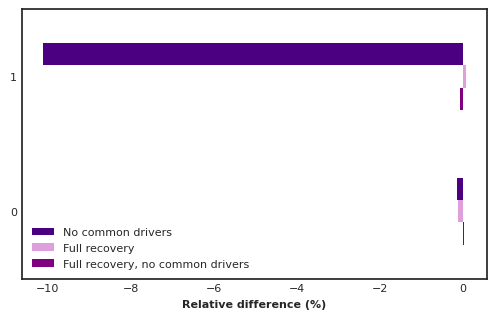

In [360]:
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.titlesize'] = 12


fig, ax = plt.subplots(figsize=(6,3.5))
df.plot.barh(color=["purple","plum","indigo"], ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Relative difference (%)")
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [2, 1, 0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()

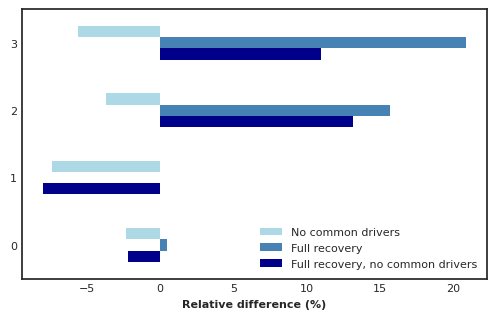

In [27]:
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.titlesize'] = 12


fig, ax = plt.subplots(figsize=(6,3.5))
df.plot.barh(color=["darkblue","steelblue","lightblue"], ax=ax).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Relative difference (%)")
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [2, 1, 0]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()


In [340]:
impact_combined_not_caped['2']['assets'][('TC', 'RF')].at_event

array([7.05620773e+10, 4.59171692e+10, 3.38622793e+10, ...,
       1.31919587e+11, 1.57358684e+11, 1.33484545e+11])

In [233]:
rel_diff_dict_100y_no_drivers
  

{'1': {'assets': {('TC', 'RF'): 0.027312001693685247},
  'pop': {('TC', 'RF'): -0.014866380959150887}},
 '2': {'assets': {('TC', 'RF'): -0.042989871373120186},
  'pop': {('TC', 'RF'): -0.06134792506155516}}}

In [234]:
rel_diff_dict_aai_no_drivers

{'1': {'assets': {('TC', 'RF'): 0.01919704710998395},
  'pop': {('TC', 'RF'): -0.007341346863037476}},
 '2': {'assets': {('TC', 'RF'): -0.0009672372049312253},
  'pop': {('TC', 'RF'): -0.000647492475589771}}}

In [622]:
rel_change_dict = {warming:{exp:{hazard: (np.median(aai_single_hazard[warming][exp][hazard]) - np.median(aai_single_hazard['1'][exp][hazard]))/np.median(aai_single_hazard['1'][exp][hazard])\
    for hazard in aai_single_hazard[warming][exp]} for exp in aai_single_hazard[warming]} \
    for warming in aai_single_hazard}   

rel_change_dict_combined = {warming:{exp:{hazard: (np.median(aai_ord[warming][exp][hazard]) - np.median(aai_ord['1'][exp][hazard]))/np.median(aai_ord['1'][exp][hazard])\
     for hazard in aai_ord[warming][exp]} for exp in aai_ord[warming]} \
     for warming in aai_ord}   

rel_change_dict_100y = {warming:{exp:{hazard: (np.median(y100_single_hazard[warming][exp][hazard]) - np.median(y100_single_hazard['1'][exp][hazard]))/np.median(y100_single_hazard['1'][exp][hazard])\
    for hazard in aai_single_hazard[warming][exp]} for exp in aai_single_hazard[warming]} \
    for warming in aai_single_hazard}   

rel_change_dict_combined_100y = {warming:{exp:{hazard: (np.median(y100_aai_ord[warming][exp][hazard]) - np.median(y100_aai_ord['1'][exp][hazard]))/np.median(y100_aai_ord['1'][exp][hazard])\
     for hazard in y100_aai_ord[warming][exp]} for exp in y100_aai_ord[warming]} \
     for warming in y100_aai_ord}       



            

In [623]:
rel_change_dict

{'1': {'assets': {'TC': 0.0, 'RF': 0.0}, 'pop': {'TC': 0.0, 'RF': 0.0}},
 '2': {'assets': {'TC': -0.047042097908867264, 'RF': 0.16077758547941984},
  'pop': {'TC': -0.009701172509915755, 'RF': 0.22021921042094142}}}

In [556]:
rel_change_dict_100y

{'1': {'assets': {'TC': 0.0, 'RF': 0.0}, 'pop': {'TC': 0.0, 'RF': 0.0}},
 '2': {'assets': {'TC': 0.10548413372606404, 'RF': 0.13192186828380836},
  'pop': {'TC': 0.1368320316018793, 'RF': 0.26325017848296517}}}

In [626]:
rel_change_dict_combined

{'1': {'assets': {('TC', 'RF'): 0.0}, 'pop': {('TC', 'RF'): 0.0}},
 '2': {'assets': {('TC', 'RF'): 0.053824659107866595},
  'pop': {('TC', 'RF'): 0.04456041016542479}}}

In [625]:
rel_change_dict_combined_100y

{'1': {'assets': {('TC', 'RF'): 0.0}, 'pop': {('TC', 'RF'): 0.0}},
 '2': {'assets': {('TC', 'RF'): 0.10555233437794},
  'pop': {('TC', 'RF'): 0.19111350914774156}}}

In [ ]:
for exp in ['assets', 'pop']:
    
    for warming in ['2']:
        fig,ax = plt.subplots()
        d = {hazard:rel_change_dict_combined[warming][exp][hazard] for hazard in rel_change_dict_combined[warming][exp]}
        d2 = {hazard:rel_change_dict[warming][exp][hazard] for hazard in rel_change_dict[warming][exp]}
        d.update(d2)
        
#         err = {hazard:rel_change_dict_combined_unc[hazard][exp][warming] for hazard in rel_change_dict_combined}
#         err2 = {hazard:rel_change_dict_unc[hazard][exp][warming] for hazard in rel_change_dict}
#         err.update(err2)
        
#         err = np.array(list(err.values())).transpose()
        ax.bar(range(len(d)), list(d.values()), align='center', color=['purple','crimson','lightblue'])
        ax.set_xticks(range(len(d)), list(d.keys()))
        ax.set_title(" ".join(['Relative change in aai', exp, warming, 'degrees']))
        
        fig,ax = plt.subplots()
        d = {hazard:rel_change_dict_combined_100y[warming][exp][hazard] for hazard in rel_change_dict_combined_100y[warming][exp]}
        d2 = {hazard:rel_change_dict_100y[warming][exp][hazard] for hazard in rel_change_dict_100y[warming][exp]}
        d.update(d2)
        
      
        ax.bar(range(len(d)), list(d.values()), align='center',color=['purple','crimson','lightblue'])
        ax.set_xticks(range(len(d)), list(d.keys()))
        ax.set_title(" ".join(['Relative change in 1/100 year event',exp, warming, 'degrees']))

In [580]:
impact_combined_ordered['1']['assets'][('TC','RF')].at_event[impact_combined_ordered['1']['assets'][('TC','RF')].event_name=='2007_gfdl-esm2m_rcp26_54']



array([], shape=(0, 5350), dtype=float64)

In [582]:
impact_combined_ordered['1']['assets'][('TC','RF')].event_name


['2006_gfdl-esm2m_rcp26_67',
 '2006_gfdl-esm2m_rcp26_51',
 '2006_gfdl-esm2m_rcp26_72',
 '2006_gfdl-esm2m_rcp26_51',
 '2006_gfdl-esm2m_rcp26_62',
 '2006_gfdl-esm2m_rcp26_74',
 '2006_gfdl-esm2m_rcp26_53',
 '2006_gfdl-esm2m_rcp26_70',
 '2006_gfdl-esm2m_rcp26_69',
 '2006_gfdl-esm2m_rcp26_53',
 '2006_gfdl-esm2m_rcp26_57',
 '2006_gfdl-esm2m_rcp26_66',
 '2006_gfdl-esm2m_rcp26_73',
 '2006_gfdl-esm2m_rcp26_74',
 '2006_gfdl-esm2m_rcp26_58',
 '2006_gfdl-esm2m_rcp26_69',
 '2006_gfdl-esm2m_rcp26_60',
 '2006_gfdl-esm2m_rcp26_61',
 '2006_gfdl-esm2m_rcp26_72',
 '2006_gfdl-esm2m_rcp26_58',
 '2006_gfdl-esm2m_rcp26_69',
 '2006_gfdl-esm2m_rcp26_52',
 '2006_gfdl-esm2m_rcp26_54',
 '2006_gfdl-esm2m_rcp26_59',
 '2006_gfdl-esm2m_rcp26_51',
 '2006_gfdl-esm2m_rcp26_75',
 '2006_gfdl-esm2m_rcp26_74',
 '2006_gfdl-esm2m_rcp26_75',
 '2006_gfdl-esm2m_rcp26_72',
 '2006_gfdl-esm2m_rcp26_73',
 '2006_gfdl-esm2m_rcp26_68',
 '2006_gfdl-esm2m_rcp26_66',
 '2006_gfdl-esm2m_rcp26_63',
 '2006_gfdl-esm2m_rcp26_63',
 '2006_gfdl-es

In [273]:
cmap_copy = plt.cm.get_cmap('viridis').copy()
cmap_copy.set_under('Gray', alpha=1)
#impact_combined_ordered['2']['assets'][('TC','RF')].coord_exp = impacts_yearsets['2']['assets']['RF'].coord_exp

ax = impact_combined_ordered['1']['assets'][('TC','RF')].plot_hexbin_eai_exposure(pop_name=False,  cmap=cmap_copy,  adapt_fontsize=False, norm=matplotlib.colors.SymLogNorm(linthresh=1))
ax.set_title('')


plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/aggr_map_assets.jpeg', dpi=1200, bbox_inches='tight')



cmap_copy = plt.cm.get_cmap('plasma').copy()
cmap_copy.set_under('Gray', alpha=1)

ax = impact_combined_ordered['1']['pop'][('TC','RF')].plot_hexbin_eai_exposure(pop_name=False,  cmap=cmap_copy,  adapt_fontsize=False, norm=matplotlib.colors.SymLogNorm(linthresh=1))
ax.set_title('')
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/aggr_map_pop.jpeg', dpi=1200, bbox_inches='tight')






In [274]:
years_warming_level = {'1 degree': {
    'rcp26': {'gfdl-esm2m': [2006, 2023], 'miroc5': [2006, 2025], 'hadgem2-es': [2006, 2019], 'ipsl-cm5a-lr': None},
    'rcp60': {'gfdl-esm2m': [2006, 2027], 'miroc5': [2013, 2034], 'hadgem2-es': [2006, 2023], 'ipsl-cm5a-lr': None}},

    '2 degree': {'rcp26': {'gfdl-esm2m': None, 'miroc5': None, 'hadgem2-es': None, 'ipsl-cm5a-lr': [2019, 2040]},
          'rcp60': {'gfdl-esm2m': [2066, 2087], 'miroc5': [2061, 2082], 'hadgem2-es': [2040, 2061], 'ipsl-cm5a-lr': [2019, 2040]}}}


In [275]:
a = []
for t in ['1']:
    for r in ['rcp26','rcp60']:
        for g in years_warming_level[t][r]:
            if years_warming_level[t][r][g] is not None:
                for year in np.arange(years_warming_level[t][r][g][0],years_warming_level[t][r][g][1]):
                    a.append("_".join([r,g,str(year)]))
                        

KeyError: '1'

In [278]:
years_warming_level

{'1 degree': {'rcp26': {'gfdl-esm2m': [2006, 2023],
   'miroc5': [2006, 2025],
   'hadgem2-es': [2006, 2019],
   'ipsl-cm5a-lr': None},
  'rcp60': {'gfdl-esm2m': [2006, 2027],
   'miroc5': [2013, 2034],
   'hadgem2-es': [2006, 2023],
   'ipsl-cm5a-lr': None}},
 '2 degree': {'rcp26': {'gfdl-esm2m': None,
   'miroc5': None,
   'hadgem2-es': None,
   'ipsl-cm5a-lr': [2019, 2040]},
  'rcp60': {'gfdl-esm2m': [2066, 2087],
   'miroc5': [2061, 2082],
   'hadgem2-es': [2040, 2061],
   'ipsl-cm5a-lr': [2019, 2040]}}}

In [280]:
import pandas
df = pandas.DataFrame.from_dict(years_warming_level, orient="index").stack().to_frame()
# to break out the lists into columns
df = pandas.DataFrame(df[0].values.tolist(), index=df.index)

In [281]:
print(df.to_latex(index=True))

\begin{tabular}{llllll}
\toprule
         &       &    gfdl-esm2m &        miroc5 &    hadgem2-es &  ipsl-cm5a-lr \\
\midrule
1 degree & rcp26 &  [2006, 2023] &  [2006, 2025] &  [2006, 2019] &          None \\
         & rcp60 &  [2006, 2027] &  [2013, 2034] &  [2006, 2023] &          None \\
2 degree & rcp26 &          None &          None &          None &  [2019, 2040] \\
         & rcp60 &  [2066, 2087] &  [2061, 2082] &  [2040, 2061] &  [2019, 2040] \\
\bottomrule
\end{tabular}



/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_94618/2143236214.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=True))


In [202]:
df[(df.gmt>0.99)&(df.gmt<1.01)]

,rcp,gcm,year,month,gmt,esoi,model
34,rcp26,GFDL-ESM2M,2014,6.5,0.990437,-0.311683,2014_gfdl-esm2m_rcp26
35,rcp26,GFDL-ESM2M,2015,6.5,1.009675,-0.679011,2015_gfdl-esm2m_rcp26
254,rcp26,IPSL-CM5A-LR,1992,6.5,1.004265,-0.371120,1992_ipsl-cm5a-lr_rcp26
396,rcp26,MIROC5,2013,6.5,0.996225,0.034177,2013_miroc5_rcp26
397,rcp26,MIROC5,2014,6.5,1.004416,-0.349411,2014_miroc5_rcp26
398,rcp26,MIROC5,2015,6.5,0.998225,-1.252290,2015_miroc5_rcp26
399,rcp26,MIROC5,2016,6.5,1.001321,-1.276066,2016_miroc5_rcp26
521,rcp60,GFDL-ESM2M,2017,6.5,1.004485,-0.635886,2017_gfdl-esm2m_rcp60
738,rcp60,IPSL-CM5A-LR,1992,6.5,1.004265,-0.371120,1992_ipsl-cm5a-lr_rcp60
887,rcp60,MIROC5,2020,6.5,0.991035,-0.280256,2020_miroc5_rcp60


In [217]:
np.arange(2066, 2087)

array([2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076,
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086])

/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


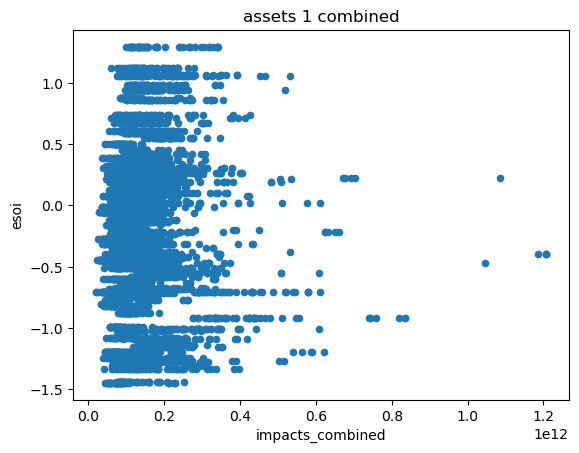

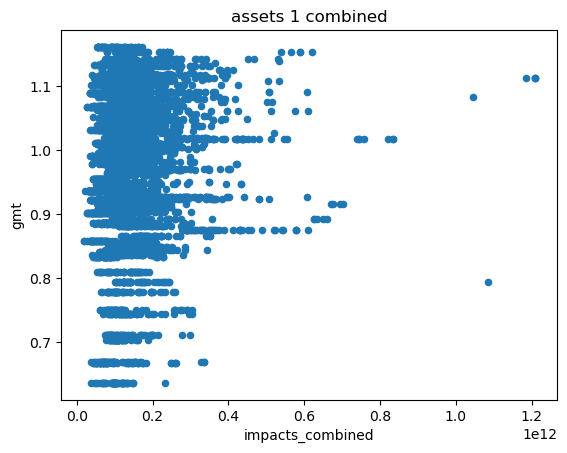

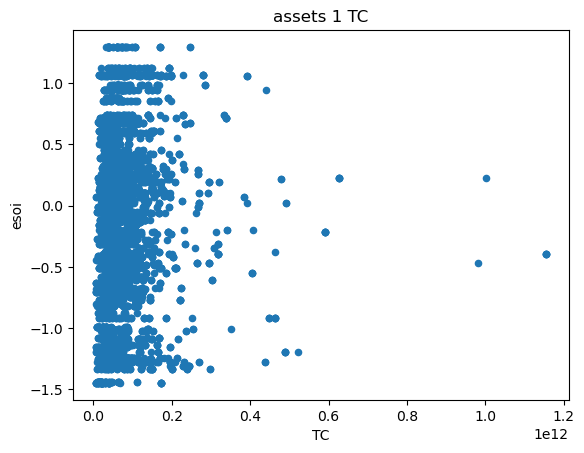

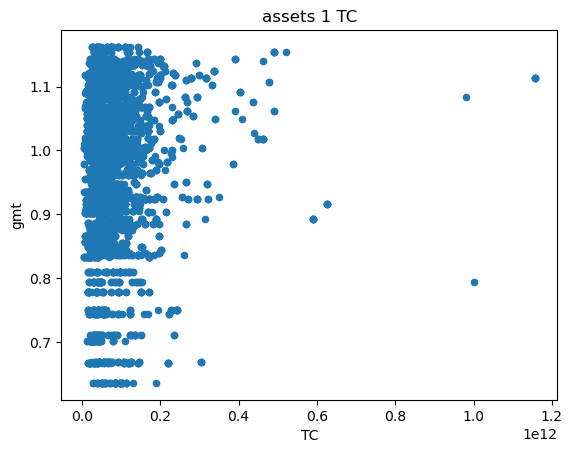

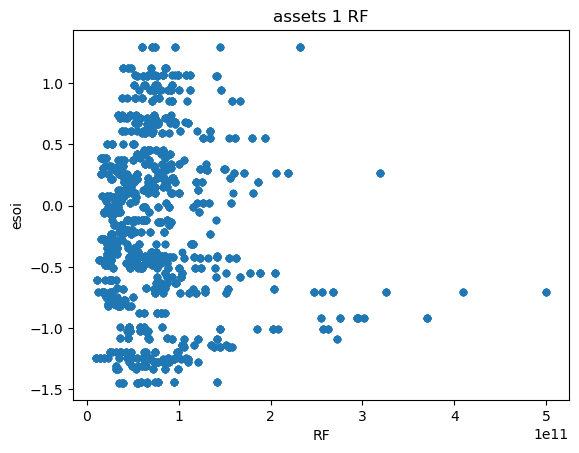

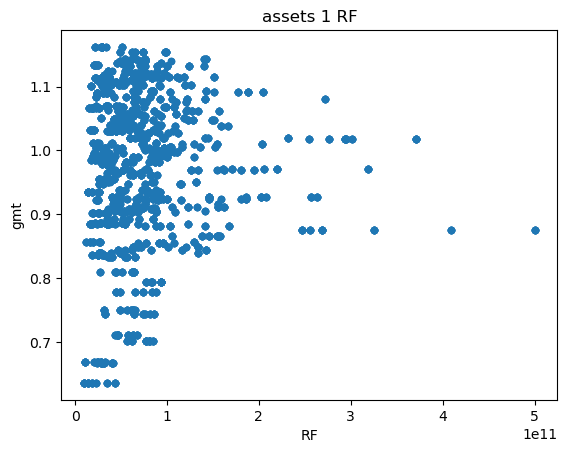

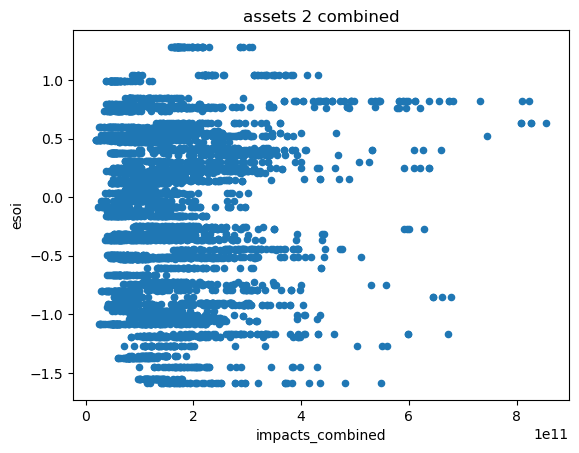

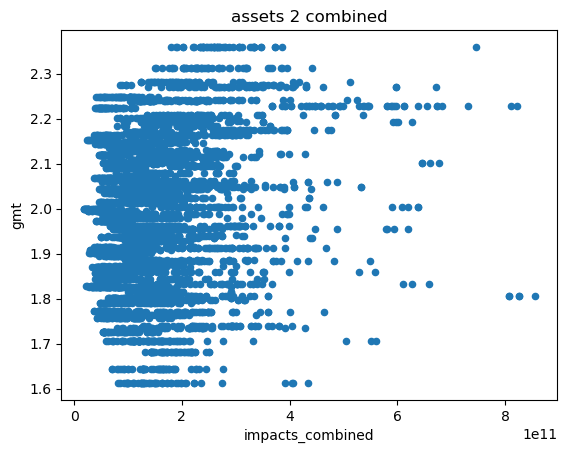

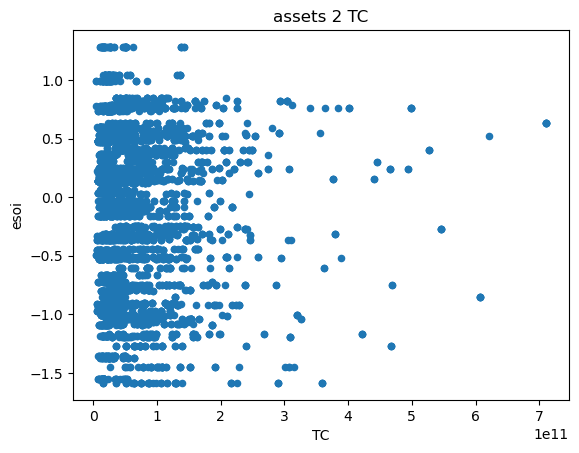

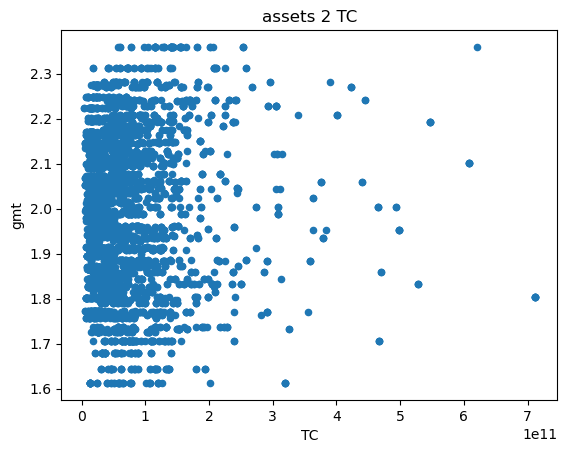

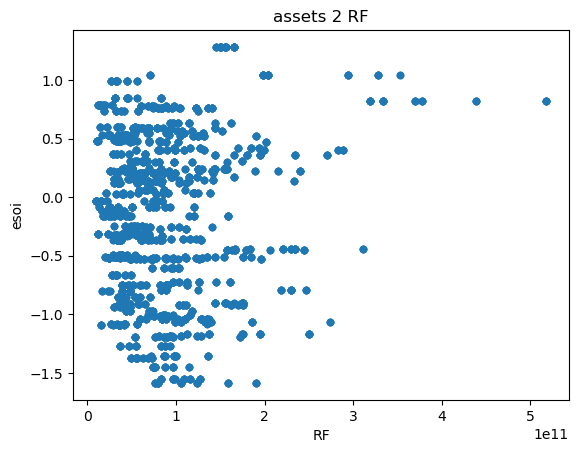

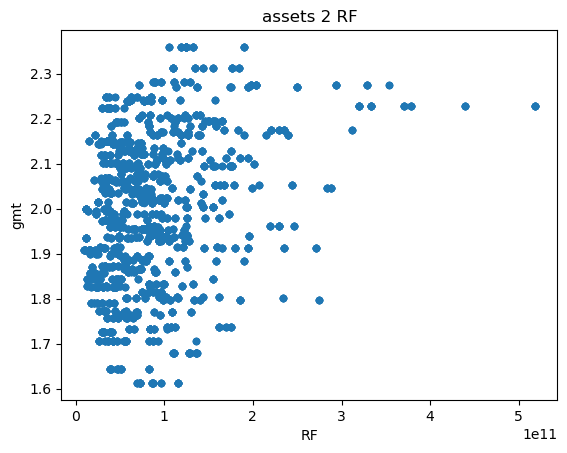

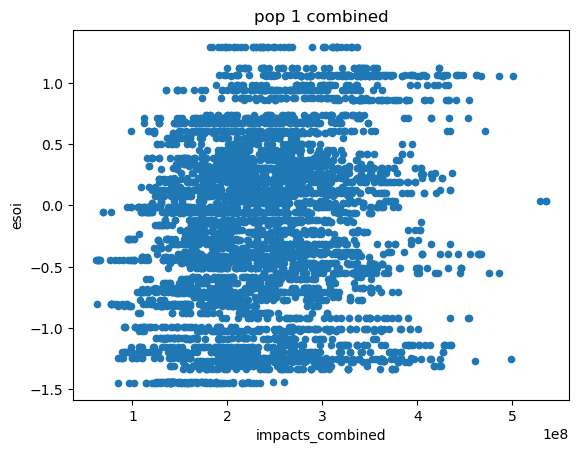

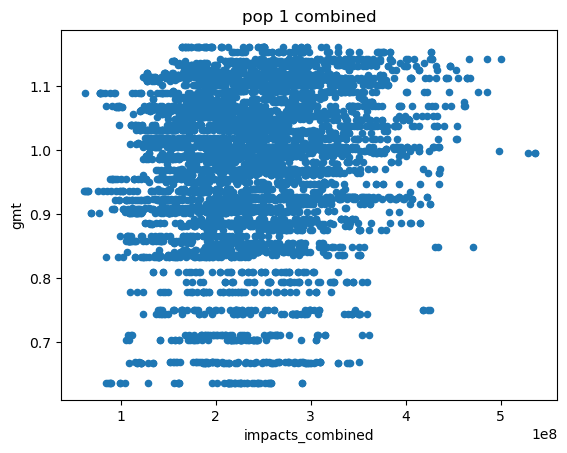

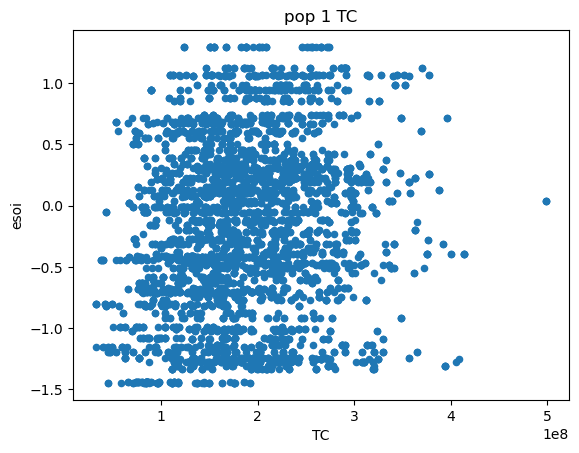

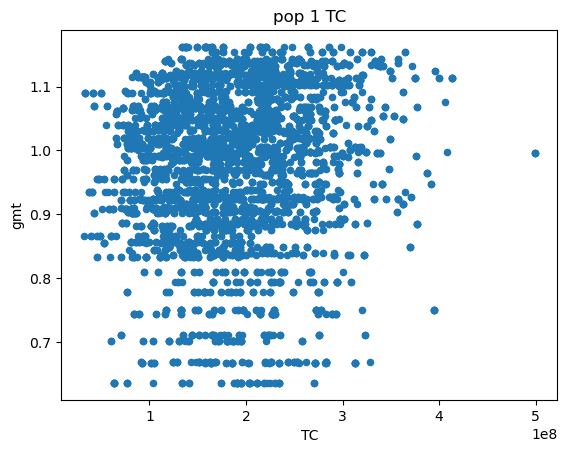

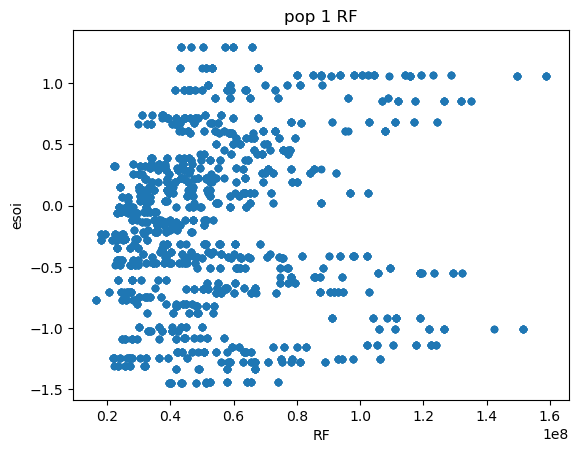

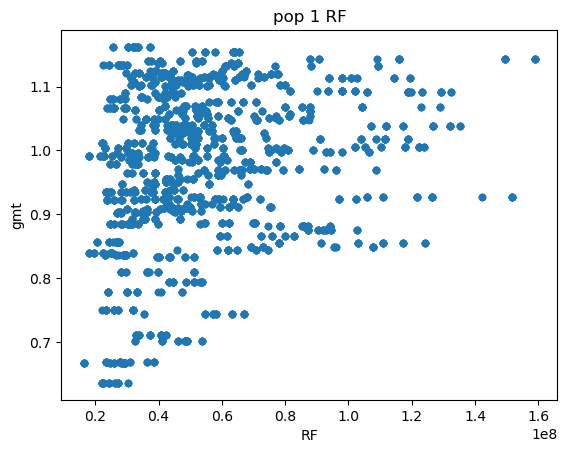

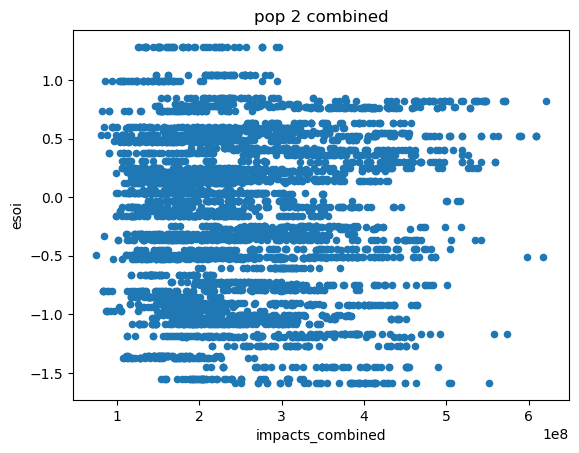

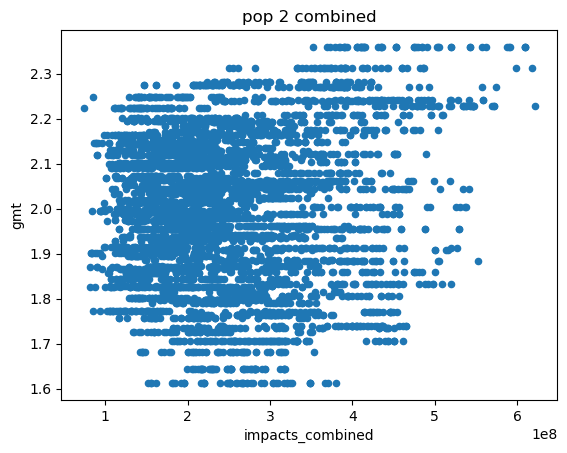

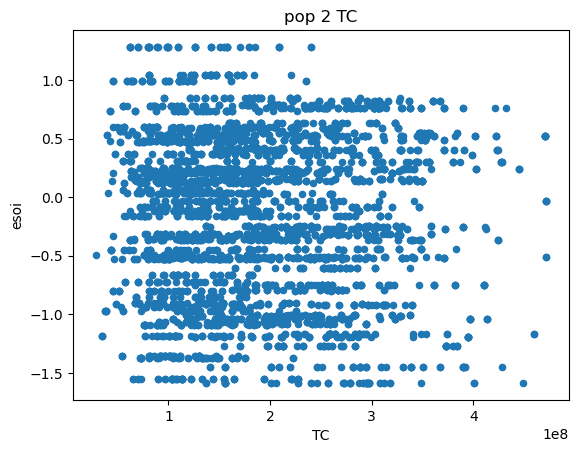

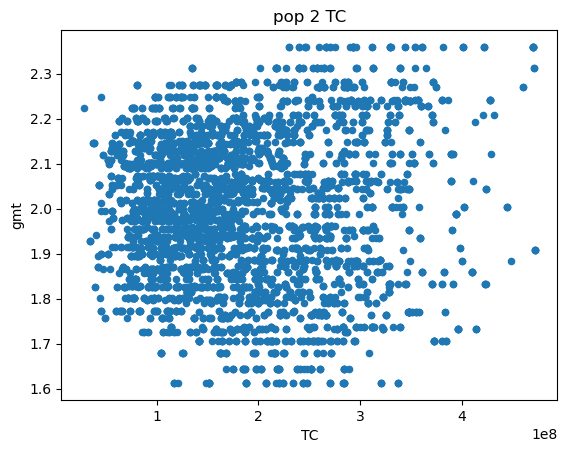

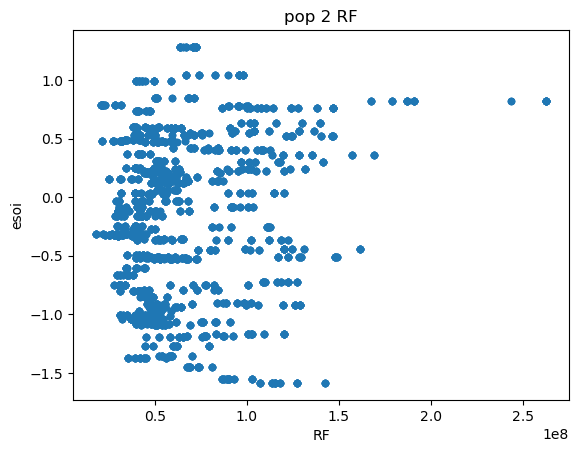

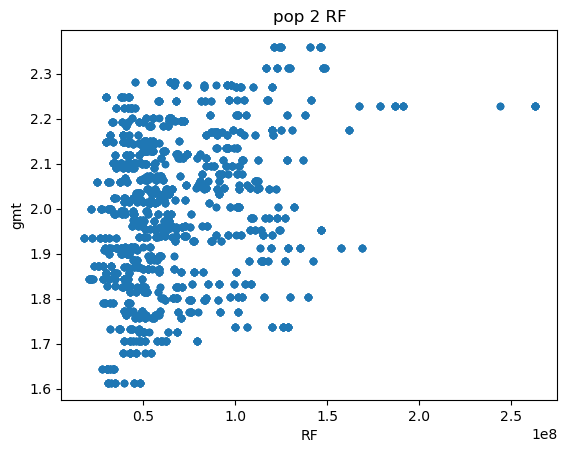

In [15]:
import xarray as xr
import pandas as pd
ds = xr.open_dataset("/Users/szelie/Downloads/climate_index.nc")
df = ds.to_dataframe().reset_index()
df = df.groupby(['rcp','gcm','year']).mean().reset_index()
df['model'] = df['year'].astype('str') + '_' + df['gcm'].str.lower() + '_' + df['rcp']
for exp in ['assets','pop']:
    for temp in ['1','2']:
        models = ["_".join(event.split("_")[0:3]) for event in impact_combined_ordered[temp][exp][('TC','RF')].event_name]
        impact_df = pd.DataFrame({'model':models, 'impacts_combined': impact_combined_ordered[temp][exp][('TC','RF')].at_event}) 
        impact_df = impact_df.merge(df)
        impact_df['TC'] = impacts_yearsets[temp][exp]['TC'].at_event
        impact_df['RF'] = impacts_yearsets[temp][exp]['RF'].at_event


        impact_df.plot.scatter('impacts_combined', 'esoi')
        plt.title(" ".join([exp, temp, 'combined']))

        impact_df.plot.scatter('impacts_combined', 'gmt')
        plt.title(" ".join([exp, temp, 'combined']))
        
        for hazard in ['TC','RF']:
            impact_df.plot.scatter(hazard, 'esoi')
            plt.title(" ".join([exp, temp, hazard]))

            impact_df.plot.scatter(hazard, 'gmt')
            plt.title(" ".join([exp, temp, hazard]))

        
        

In [141]:
df = ds.to_dataframe().reset_index()


In [148]:
df = df.groupby(['rcp','gcm','year']).mean().reset_index()

In [165]:
df['model'] = df['year'].astype('str') + '_' + df['gcm'].str.lower() + '_' + df['rcp']

In [183]:
models = ["_".join(event.split("_")[0:3]) for event in impact_combined_ordered['2']['pop'][('TC','RF')].event_name]

In [184]:
import pandas as pd
impact_df_pop = pd.DataFrame({'model':models, 'impacts_combined_1': impact_combined_ordered['2']['pop'][('TC','RF')].at_event})

<AxesSubplot:xlabel='impacts_combined_1', ylabel='esoi'>

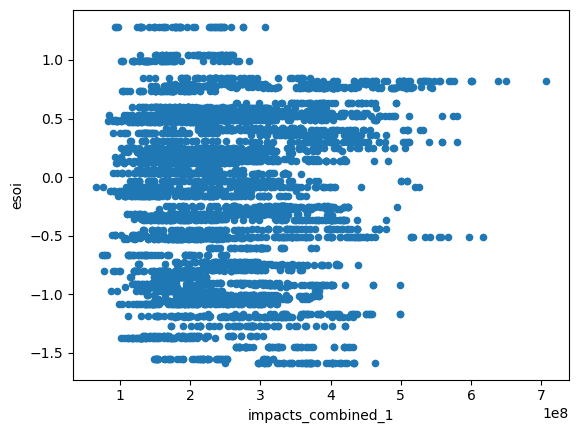

In [186]:
impact_df_pop.merge(df).plot.scatter('impacts_combined_1', 'esoi')